# The number of ML-based publications in science (fig. 1.3)
## Author: Anna Dawid (based on data from [B. Blaiszik](https://github.com/blaiszik/ml_publication_charts))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
# Import custom font
import matplotlib.font_manager as fm
from pathlib import Path

path_text = Path(r'../fonts/Hero New Regular.otf') # for text only
path_abc = r'..\fonts\Hero New Medium.otf' # for (a), (b), etc.
custom_font_text = fm.FontProperties(fname=path_text)
custom_font_abc = fm.FontProperties(fname=path_abc)

In [4]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open('..\colors\colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open('..\colors\colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()


In [5]:
import csv

mat_science = []
physics = []
chemistry = []

years = np.arange(2000,2021.1,1)

with open('.\ML_papers_data.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        if row[3] == "Materials Science":
            mat_science.append([int(row[1])/int(row[2])*100])
        elif row[3] == "Physics":
            physics.append([int(row[1])/int(row[2])*100])
        elif row[3] == "Chemistry":
            chemistry.append([int(row[1])/int(row[2])*100])
        else:
            continue

mat_science.reverse()
physics.reverse()
chemistry.reverse()

C:\Users\ankad\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\ankad\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
'Hero New Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


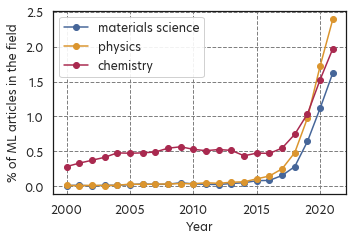

In [9]:
# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(5.25,3.375)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})

fig, ax = plt.subplots()

ax.plot(years, mat_science, 'o-', color=colors_dict["blue"]["dark"], label='materials science')
ax.plot(years, physics, 'o-', color=colors_dict["yellow"]["dark"], label='physics')
ax.plot(years, chemistry, 'o-', color=colors_dict["purple"]["dark"], label='chemistry')
ax.set_xlabel('Year', size=12, fontproperties=custom_font_text)
ax.set_ylabel('% of ML articles in the field', size=12, fontproperties=custom_font_text)
ax.tick_params(labelsize=10)

ax.legend(fontsize = 10, framealpha = 0.9, prop=fm.FontProperties(fname=path_text))
#plt.axis([1.0, 3.0, -0.05, 1.05])
#plt.yticks(np.arange(0,1.1,0.25))
#plt.xticks(np.arange(1,3.1,0.5))

ax.set_yticklabels(np.round(ax.get_yticks(),1), font=path_text, fontsize=12)
ax.set_xticklabels(ax.get_xticks().astype('int'), font=path_text, fontsize=12)

fig.tight_layout()
fig.savefig('fig1-3.pdf')